In [2]:
# Working on figuring out how to prevent rounding error in transit
# times using compensated summation from Kahan (1965).
#    https://en.wikipedia.org/wiki/Kahan_summation_algorithm
#    PDF: http://mgnet.org/~douglas/Classes/na-sc/notes/kahan.pdf
# Creates a grid of times starting at t0 and going for a duration
# of tmax with stepsize h.
# Three different approaches:
# 1). Time grid is computed in Float64.
# 2). Time grid is computed in BigFloat
# 3). Time grid is computed with compensated summation (ala Kahan 1965).

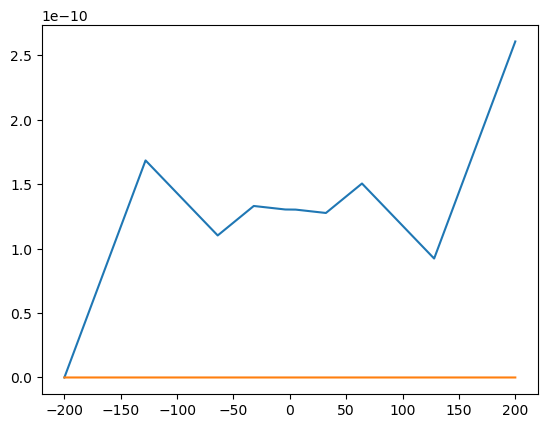

Maximum difference with Float64 precision: 2.6062707547680475e-10
Maximum difference with compensated summation: 0.0


In [4]:
using PyPlot


# Initial time of integration:
t0 =  -200.0
# Step size:
h  = 0.07/16
# Total duration of integration:
tmax = 400.0

# Compute time in Float64 (double precision):
time = t0
# Compute time in in BigFloat:
time_big = big(t0)
# Next use compensated summation:
time_comp = t0

# Utilize the notation from Kahan (1965):  s2 is
# the error estimate for when time_comp was last rounded
# or truncated:
s2 = 0.0

# Create arrays to hold the time steps:
times = [time]
times_big = [time_big]
times_comp = [time_comp]
hbig = big(h)

# Step over the time steps until maximum time is reached:
while time < t0+tmax
  # Float64 times:
  time += h
  push!(times,time)
  # BigFloat times:
  time_big += hbig
  push!(times_big,time_big)
  # Kahan (1965) compensated summation algorithm:
  s2 += h
  tmp = time_comp + s2
  s2 = (time_comp - tmp) + s2
  time_comp = tmp
  push!(times_comp,time_comp)
end


plot(times,times-convert(Array{Float64,1},times_big))
diff_double = maximum(abs.(times-convert(Array{Float64,1},times_big)))
plot(times,times_comp-convert(Array{Float64,1},times_big))
diff_comp = maximum(abs.(times_comp-convert(Array{Float64,1},times_big)))
println("Maximum difference with Float64 precision: ",diff_double)
println("Maximum difference with compensated summation: ",diff_comp)